# Bike Sharing System Data Characteristics Study

## by Iman Ragab

## Investigation Overview

In this investigation, I wanted to look at the characteristics of Bike Sharing System that could affect other features of the data. The main focus was on trip duration, hour of day, day of week and customer type.

## Dataset Overview

The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data consisted of 16 attributes of approximately 183,412 trips. The attributes included data about customers, locations and dates of the trips.

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
# load in the dataset into a pandas dataframe
bike_shares_df = pd.read_csv('fordgobike-tripdata.csv')

In [13]:
# change start_time, end_time columns to datetime

bike_shares_df.start_time = pd.to_datetime(bike_shares_df.start_time)

bike_shares_df.end_time = pd.to_datetime(bike_shares_df.end_time)

In [14]:
# create day_of_week column using start_time

bike_shares_df['start_day_of_week'] = bike_shares_df.start_time.dt.day_name().astype('category')

In [15]:
# create hour_of_day column

bike_shares_df['start_hour_of_day'] = bike_shares_df.start_time.dt.hour

In [18]:
# change duration_sec to minutes

bike_shares_df.duration_sec = (bike_shares_df.duration_sec / 60).map(lambda x: '%2.1f' % x).astype('float')

# rename duration_sec column

bike_shares_df.rename(columns={"duration_sec": 'duration_min'}, inplace=True);

## When are most trips taken in terms of Hours and Days?

As we can see the bimodal distribution for time of the day shows that the most popular hours of the day  for rides are 8 AM and 5 PM. These time of the day correspnods to when people go to or coming from work. 

While the bivariate distribution of time of the day & day of week show that on weekends, the number of rides starts gradually increasing around 8-9 AM and gradually decreasing around 5-6 PM .

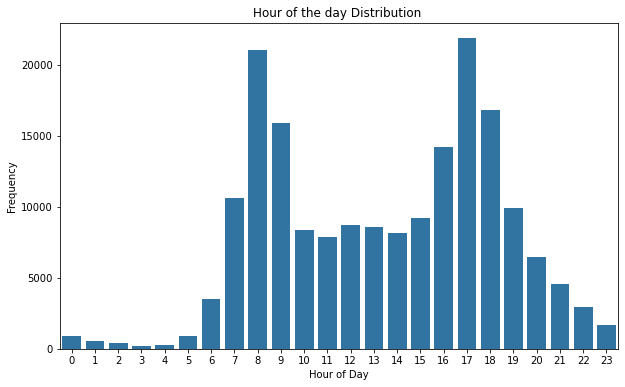

In [16]:
plt.figure(figsize = [10, 6])

default_color = sb.color_palette()[0]

sb.countplot(data = bike_shares_df, x = 'start_hour_of_day', color = default_color).set(xlabel='Hour of Day', ylabel='Frequency');

plt.title('Hour of the day Distribution ')

plt.show()

## Relation between Hours of Day and Days of Week.

The bivariate distribution of time of the day & day of week show that on weekends, the number of rides starts gradually increasing around 8-9 AM and gradually decreasing around 5-6 PM .

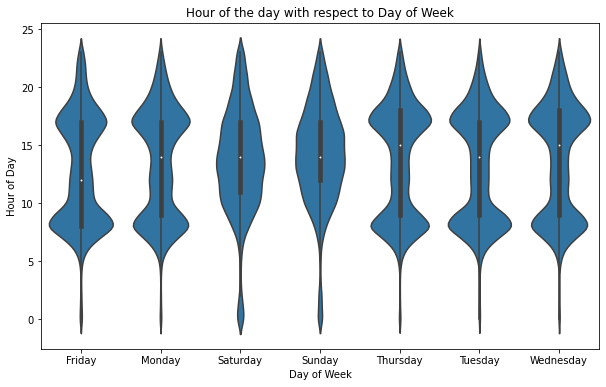

In [17]:
plt.figure(figsize = [10, 6])


base_color = sb.color_palette()[0]

sb.violinplot(
    data=bike_shares_df, 
    y='start_hour_of_day', 
    x='start_day_of_week', 
    color=base_color, 
    innner=None,
);

plt.xlabel('Day of Week')
plt.ylabel('Hour of Day');
plt.title('Hour of the day with respect to Day of Week')
plt.show()

## Trip duration, day of the week & gender

We can see from this chart that other gender has the largest trip duration & women has more trip duration than men. Also on weekend days the trip duration decrease for all genders.

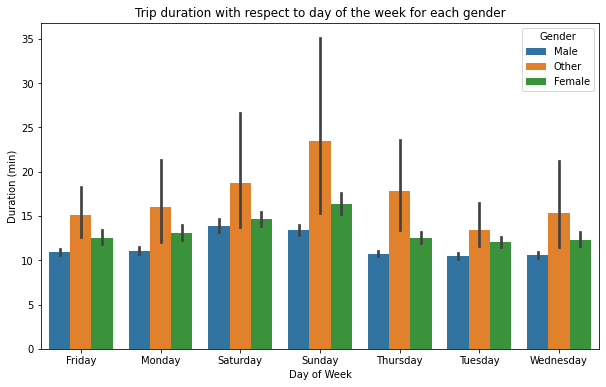

In [19]:
# plot relation between trip duration it & day of week & gender
plt.figure(figsize = [10, 6])

sb.barplot(data = bike_shares_df, x = 'start_day_of_week', y = 'duration_min', hue = 'member_gender');

plt.xlabel('Day of Week')
plt.ylabel('Duration (min)')
plt.title('Trip duration with respect to day of the week for each gender')
plt.legend(title="Gender");

In [20]:
!jupyter nbconvert "Bike_Sharing_System_Data Exploration_Slides.ipynb" --to slides --post serve --no-prompt --no-input

[NbConvertApp] Converting notebook Bike_Sharing_System_Data Exploration_Slides.ipynb to slides
[NbConvertApp] Writing 675754 bytes to Bike_Sharing_System_Data Exploration_Slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Bike_Sharing_System_Data Exploration_Slides.slides.html
Use Control-C to stop this server
^C

Interrupted
